<a href="https://colab.research.google.com/github/Schumi543/various_notebook/blob/master/numerical_diff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
def forward_diff(f, x, h = 1e-4):
    return (f(x+h) - f(x)) / h

def backward_diff(f, x, h = 1e-4):
    return (f(x) - f(x-h)) / h

def central_diff(f, x, h = 1e-4):
    return (f(x+h) - f(x-h)) / (2*h)

In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_style("whitegrid")

0.20000099999917254


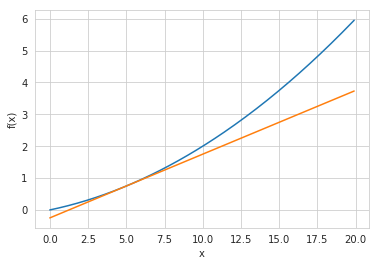

In [0]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

def tangent_line(f, x):
    d = forward_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.xlabel("x")
plt.ylabel("f(x)")

plt.plot(x, y)
plt.plot(x, y2)

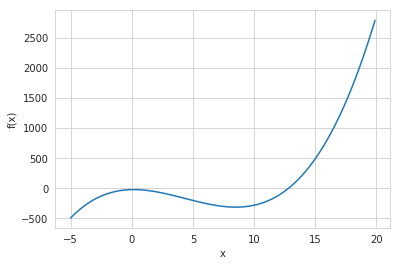

In [0]:
f = lambda x: x ** 3 - 13 * x**2 +  4 * x -21
df = lambda x: 3* x ** 2 - 26 * x +  4

x = np.arange(-5.0, 20.0, 0.1)
y = f(x)

plt.xlabel("x")
plt.ylabel("f(x)")


plt.plot(x, y)

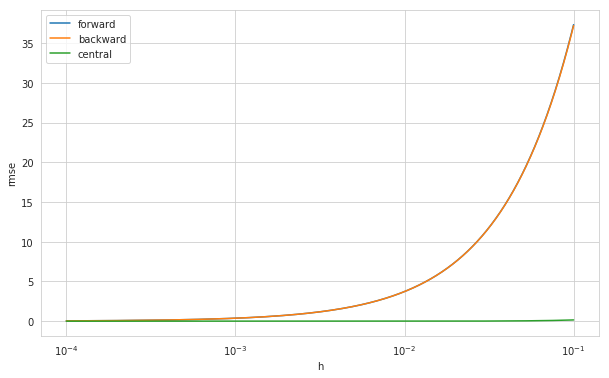

In [0]:
x = np.arange(-5.0, 20.0, 0.1)

rmse_forward = []
rmse_backward = []
rmse_central = []

h = np.arange(1e-4, 1e-1, 1e-4)
rmse_forward = [np.sqrt(sum((forward_diff(f, x, hi) - df(x))**2)) for hi in h]
rmse_backward = [np.sqrt(sum((backward_diff(f, x, hi) - df(x))**2)) for hi in h]
rmse_central = [np.sqrt(sum((central_diff(f, x, hi) - df(x))**2)) for hi in h]

fig, ax = plt.subplots(figsize=(10,6)) 

plt.xlabel("h")
plt.ylabel("rmse")

plt.plot(h, rmse_forward, label='forward')
plt.plot(h, rmse_backward, label='backward')
plt.plot(h, rmse_central, label='central')

ax.set_xscale("log", basex=10, nonposx="mask")

plt.legend()